<a href="https://colab.research.google.com/github/saylejl24/runAnalysis/blob/main/HRPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Averge HR using ML

## Reading in the data

In [51]:
import pandas as pd
import numpy as np
df = pd.read_csv('sample_data/ActivitiesGarmin.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             807 non-null    object 
 1   Date                      807 non-null    object 
 2   Favorite                  807 non-null    bool   
 3   Title                     807 non-null    object 
 4   Distance                  807 non-null    float64
 5   Calories                  807 non-null    object 
 6   Time                      807 non-null    object 
 7   Avg HR                    807 non-null    object 
 8   Max HR                    807 non-null    object 
 9   Aerobic TE                807 non-null    object 
 10  Avg Run Cadence           807 non-null    int64  
 11  Max Run Cadence           807 non-null    int64  
 12  Avg Pace                  807 non-null    object 
 13  Best Pace                 807 non-null    object 
 14  Total Asce

## Choosing Predictors 
In this study, the following predictors have been chosen. Alterations may result in a more accurate model

In [52]:
df = df[['Date', 'Distance','Calories','Avg Run Cadence', 'Avg Pace', 'Best Pace', 
         'Avg Stride Length', 'Elapsed Time', 'Aerobic TE', 'Number of Laps', 'Moving Time', 'Max HR', 'Min Elevation', 'Max Elevation' ,'Avg HR']]
df['Date'].describe()
df.head()

,Date,Distance,Calories,Avg Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time,Aerobic TE,Number of Laps,Moving Time,Max HR,Min Elevation,Max Elevation,Avg HR
0,11/7/2021 9:13,7.48,744,164,8:07,6:58,1.21,1:09:15,3.4,8,1:00:16,184,772,942,155
1,11/6/2021 9:12,4.03,403,165,7:32,6:38,1.29,0:30:36,3.3,5,0:30:19,174,850,889,157
2,11/5/2021 15:09,4.01,371,163,7:16,4:16,1.36,0:41:23,3,5,0:28:50,177,785,896,155
3,11/4/2021 15:35,4.89,497,164,7:18,6:24,1.35,0:38:05,--,5,0:35:40,--,788,984,--
4,11/3/2021 16:24,5.30,511,164,7:07,6:31,1.38,0:40:41,3.5,6,0:37:44,179,771,889,163


## Data Cleaning 

The following alterations were made to the data to make sure that the data types of predictors are compatable to the models that we will build later. 

In [53]:
#convert 'Date', 'Avg Pace', 'Best Pace', 'Elapsed Time' objects to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Avg Pace'] = pd.to_datetime(df['Avg Pace'], format='%M:%S', errors = 'coerce')
df['Best Pace'] = pd.to_datetime(df['Best Pace'], format='%M:%S', errors = 'coerce')
df['Elapsed Time'] = pd.to_datetime(df['Elapsed Time'], errors = 'coerce')
df.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Date,Distance,Calories,Avg Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time,Aerobic TE,Number of Laps,Moving Time,Max HR,Min Elevation,Max Elevation,Avg HR
0,2021-11-07 09:13:00,7.48,744,164,1900-01-01 00:08:07,1900-01-01 00:06:58,1.21,2022-04-13 01:09:15,3.4,8,1:00:16,184,772,942,155
1,2021-11-06 09:12:00,4.03,403,165,1900-01-01 00:07:32,1900-01-01 00:06:38,1.29,2022-04-13 00:30:36,3.3,5,0:30:19,174,850,889,157
2,2021-11-05 15:09:00,4.01,371,163,1900-01-01 00:07:16,1900-01-01 00:04:16,1.36,2022-04-13 00:41:23,3,5,0:28:50,177,785,896,155
3,2021-11-04 15:35:00,4.89,497,164,1900-01-01 00:07:18,1900-01-01 00:06:24,1.35,2022-04-13 00:38:05,--,5,0:35:40,--,788,984,--
4,2021-11-03 16:24:00,5.30,511,164,1900-01-01 00:07:07,1900-01-01 00:06:31,1.38,2022-04-13 00:40:41,3.5,6,0:37:44,179,771,889,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2019-07-16 11:19:00,5.63,518,148,1900-01-01 00:08:47,1900-01-01 00:06:45,1.24,2022-04-13 01:25:29,--,6,0:49:21,189,627,882,166
803,2019-07-12 09:29:00,6.04,556,150,1900-01-01 00:08:43,1900-01-01 00:03:10,1.23,2022-04-13 00:52:42,--,7,0:52:32,179,910,"1,052",166
804,2019-07-10 09:23:00,5.03,427,150,1900-01-01 00:07:56,1900-01-01 00:07:09,1.35,2022-04-13 00:39:53,--,6,0:39:51,188,840,897,177
805,2019-07-09 14:19:00,2.52,167,148,1900-01-01 00:07:50,1900-01-01 00:06:15,1.40,2022-04-13 00:19:46,--,3,0:19:43,154,858,"1,020",146


In [54]:
#convert 'Avg Pace', 'Best Pace', 'Elapced Time' objects to the number of minutes
df['Avg Pace'] = df['Avg Pace'].dt.hour*60 + df['Avg Pace'].dt.minute + df['Avg Pace'].dt.second/60
df['Best Pace'] = df['Best Pace'].dt.hour*60 + df['Best Pace'].dt.minute + df['Best Pace'].dt.second/60
df['Elapsed Time'] = df['Elapsed Time'].dt.hour*60 + df['Elapsed Time'].dt.minute + df['Elapsed Time'].dt.second/60
#add 'Avg Speed' and 'Best Speed' columns
df['Avg Speed'] = 60 / df['Avg Pace']
df['Best Speed'] = 60 / df['Best Pace']
df

,Date,Distance,Calories,Avg Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time,Aerobic TE,Number of Laps,Moving Time,Max HR,Min Elevation,Max Elevation,Avg HR,Avg Speed,Best Speed
0,2021-11-07 09:13:00,7.48,744,164,8.116667,6.966667,1.21,69.250000,3.4,8,1:00:16,184,772,942,155,7.392197,8.612440
1,2021-11-06 09:12:00,4.03,403,165,7.533333,6.633333,1.29,30.600000,3.3,5,0:30:19,174,850,889,157,7.964602,9.045226
2,2021-11-05 15:09:00,4.01,371,163,7.266667,4.266667,1.36,41.383333,3,5,0:28:50,177,785,896,155,8.256881,14.062500
3,2021-11-04 15:35:00,4.89,497,164,7.300000,6.400000,1.35,38.083333,--,5,0:35:40,--,788,984,--,8.219178,9.375000
4,2021-11-03 16:24:00,5.30,511,164,7.116667,6.516667,1.38,40.683333,3.5,6,0:37:44,179,771,889,163,8.430913,9.207161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2019-07-16 11:19:00,5.63,518,148,8.783333,6.750000,1.24,85.483333,--,6,0:49:21,189,627,882,166,6.831120,8.888889
803,2019-07-12 09:29:00,6.04,556,150,8.716667,3.166667,1.23,52.700000,--,7,0:52:32,179,910,"1,052",166,6.883365,18.947368
804,2019-07-10 09:23:00,5.03,427,150,7.933333,7.150000,1.35,39.883333,--,6,0:39:51,188,840,897,177,7.563025,8.391608
805,2019-07-09 14:19:00,2.52,167,148,7.833333,6.250000,1.40,19.766667,--,3,0:19:43,154,858,"1,020",146,7.659574,9.600000


In [55]:

df.replace({'--':np.nan},  inplace=True)
df.dropna()
df = df[['Date', 'Distance','Calories','Avg Run Cadence', 'Avg Pace', 'Best Pace', 
         'Avg Stride Length', 'Elapsed Time', 'Aerobic TE', 'Number of Laps','Max HR', 'Min Elevation', 'Max Elevation' ,'Avg HR']]
df.head()

,Date,Distance,Calories,Avg Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time,Aerobic TE,Number of Laps,Max HR,Min Elevation,Max Elevation,Avg HR
0,2021-11-07 09:13:00,7.48,744,164,8.116667,6.966667,1.21,69.250000,3.4,8,184,772,942,155
1,2021-11-06 09:12:00,4.03,403,165,7.533333,6.633333,1.29,30.600000,3.3,5,174,850,889,157
2,2021-11-05 15:09:00,4.01,371,163,7.266667,4.266667,1.36,41.383333,3,5,177,785,896,155
3,2021-11-04 15:35:00,4.89,497,164,7.300000,6.400000,1.35,38.083333,NaN,5,NaN,788,984,NaN
4,2021-11-03 16:24:00,5.30,511,164,7.116667,6.516667,1.38,40.683333,3.5,6,179,771,889,163


In [56]:
df.replace(',','', regex=True, inplace=True) # remove the commas from the data set

#convert remaining columns of object type to float64
s = df.select_dtypes(include='object').columns

df[s] = df[s].astype("float")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Exploratory Data Analysis

In this section, various plots are constructed to visualize the data. Analysis of the visualizations can help us determine which predictors are most important to the model. 

[Text(0.5, 1.0, 'Average HR Distribution')]

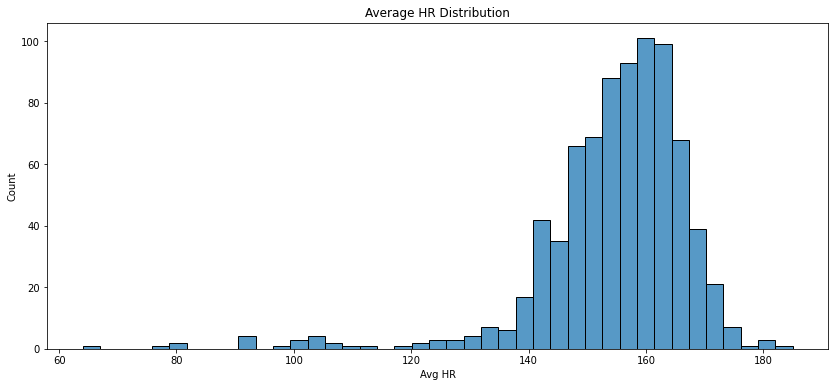

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.histplot(data = df, x='Avg HR').set(title = 'Average HR Distribution')

Correlation coefficient between cadence and speed: -0.5608619772977379


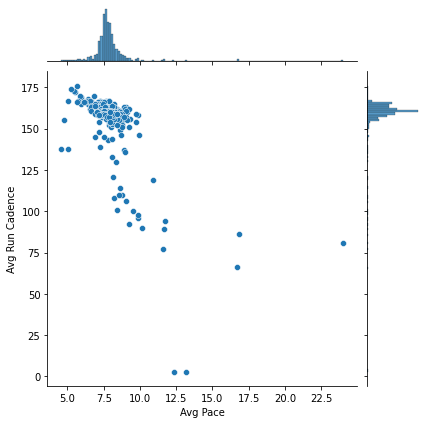

In [58]:
sns.jointplot(x='Avg Pace',y='Avg Run Cadence', data=df.dropna(),kind='scatter')
print("Correlation coefficient between cadence and speed:", df['Avg Pace'].corr(df['Avg Run Cadence']))

Correlation coefficient between stride length and speed: 0.08556695035910329


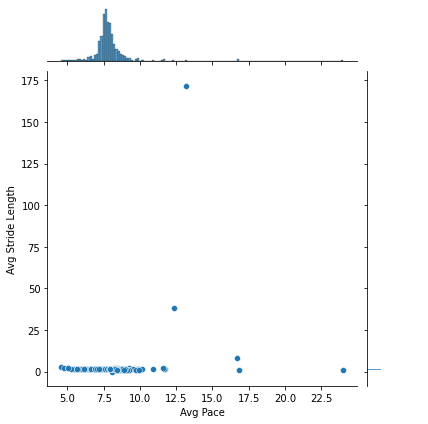

In [59]:
sns.jointplot(x='Avg Pace',y='Avg Stride Length', data=df.dropna(),kind='scatter')
print("Correlation coefficient between stride length and speed:", df['Avg Pace'].corr(df['Avg Stride Length']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


[Text(0.5, 1.0, 'Avg Pace by Month')]

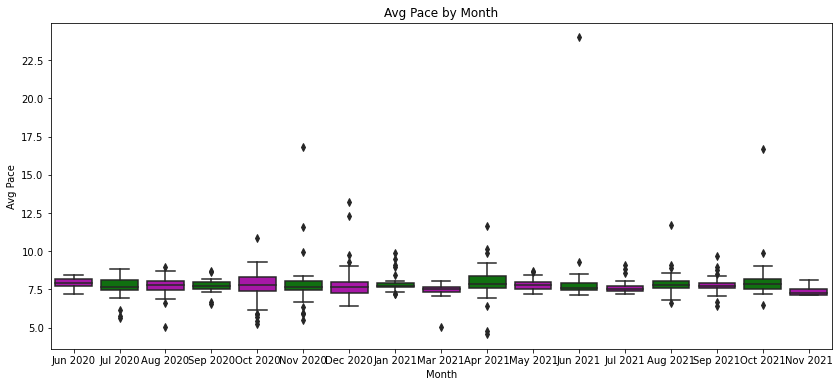

In [60]:
plt.figure(figsize=(14,6))
#add extra column with month for every running session
df['Month'] = df['Date'].dt.strftime('%b') + " " + df['Date'].dt.strftime('%Y') 
#sort datataset by date in ascending order
df.sort_values(by='Date', inplace=True)
#plot boxplots grouped by month
sns.boxplot(x='Month',y='Avg Pace', palette=["m", "g"], data=df.dropna()).set(title = 'Avg Pace by Month')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


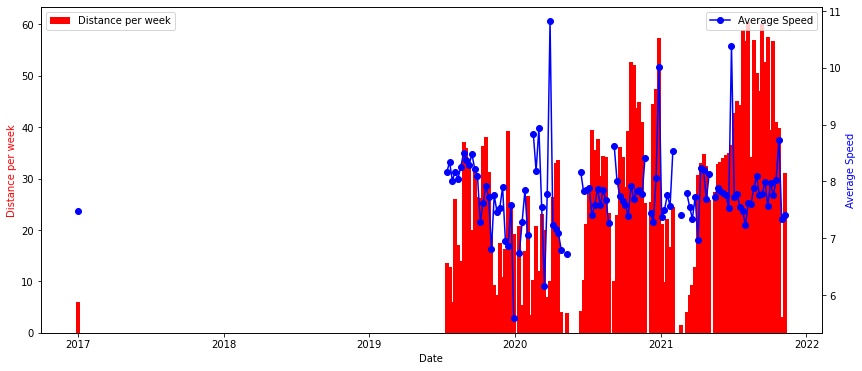

In [61]:
df['Count'] = 1
#aggregate data by week
dfW = df.groupby(pd.Grouper(key='Date',freq='W')).agg({'Count':'sum','Distance':'sum',
'Calories':'sum','Avg HR':'mean','Avg Run Cadence':'mean',  
'Avg Pace':'mean', 'Best Pace':'mean', 'Avg Stride Length':'mean', 'Elapsed Time':'mean'}).reset_index()


dfW.dropna()

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(14,6))
# make a barplot
#count = ax.bar(dfW['Date'], dfW['Count'],width=10, color='red',label='Number of Runs')
count = ax.bar(dfW['Date'], dfW['Distance'],width=10, color='red',label='Distance per week')
#ax.bar_label(count)
# set x-axis label
ax.set_xlabel('Date')
ax.legend(loc=2)
# set y-axis label
#ax.set_ylabel('Number of Runs',color='red')
ax.set_ylabel('Distance per week',color='red')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfW['Date'],dfW['Avg Pace'],color='blue',marker='o',label='Average Speed')
ax2.set_ylabel('Average Speed',color='blue')
ax2.legend()
plt.show()

## Remove Outliers

Based on the plots above, there are clearly outliers in the data that may skew results and make our models less accurate. These should be exclulded because these specific data points do not represent the subjects of interest in this study. 

In [62]:
# remove outliers
from scipy import stats

flo = df.select_dtypes(include='float').columns

for col in flo:
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    df = df[(df[col] < q_hi) & (df[col] > q_low)]

# remove the extraneous date datapoint
df = df[~(df['Date'] < '2019-01-01')]
    
df


,Date,Distance,Calories,Avg Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Elapsed Time,Aerobic TE,Number of Laps,Max HR,Min Elevation,Max Elevation,Avg HR,Month,Count
547,2020-06-13 10:54:00,2.01,166.0,160,7.916667,7.083333,1.27,15.866667,3.0,3,177.0,988.0,1050.0,165.0,Jun 2020,1
546,2020-06-14 10:08:00,2.26,203.0,159,8.416667,6.666667,1.20,19.316667,3.2,3,180.0,990.0,1163.0,165.0,Jun 2020,1
545,2020-06-18 08:02:00,1.47,125.0,154,7.933333,7.333333,1.32,11.666667,2.7,2,176.0,750.0,771.0,162.0,Jun 2020,1
544,2020-06-19 07:59:00,2.68,241.0,159,8.300000,6.633333,1.22,22.266667,3.1,3,177.0,981.0,1162.0,159.0,Jun 2020,1
543,2020-06-20 09:00:00,2.97,264.0,157,7.866667,6.983333,1.30,23.316667,3.3,3,177.0,1010.0,1040.0,164.0,Jun 2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2021-11-01 16:33:00,5.31,522.0,165,7.116667,4.233333,1.38,49.466667,3.8,6,189.0,772.0,798.0,170.0,Nov 2021,1
4,2021-11-03 16:24:00,5.30,511.0,164,7.116667,6.516667,1.38,40.683333,3.5,6,179.0,771.0,889.0,163.0,Nov 2021,1
2,2021-11-05 15:09:00,4.01,371.0,163,7.266667,4.266667,1.36,41.383333,3.0,5,177.0,785.0,896.0,155.0,Nov 2021,1
1,2021-11-06 09:12:00,4.03,403.0,165,7.533333,6.633333,1.29,30.600000,3.3,5,174.0,850.0,889.0,157.0,Nov 2021,1


In [63]:
df = df[['Date', 'Distance','Calories','Avg Run Cadence', 'Avg Pace', 'Best Pace', 
         'Avg Stride Length', 'Elapsed Time', 'Aerobic TE', 'Number of Laps', 'Max HR', 'Min Elevation', 'Max Elevation' ,'Avg HR']]


## Statistical Summary of predictors


In [64]:
print(df.describe())

         Distance    Calories  Avg Run Cadence    Avg Pace   Best Pace  \
count  409.000000  409.000000       409.000000  409.000000  409.000000   
mean     4.125623  385.154034       159.716381    7.730807    6.346047   
std      1.981381  182.911297         7.989745    0.558159    1.111364   
min      0.700000   58.000000        96.000000    5.450000    1.050000   
25%      2.460000  228.000000       159.000000    7.483333    6.000000   
50%      4.000000  367.000000       161.000000    7.700000    6.716667   
75%      5.300000  499.000000       163.000000    7.983333    7.033333   
max     10.930000  923.000000       173.000000    9.933333    8.066667   

       Avg Stride Length  Elapsed Time  Aerobic TE  Number of Laps  \
count         409.000000    409.000000  409.000000      409.000000   
mean            1.311394     48.277954    2.974817        5.599022   
std             0.092080     68.810862    0.540177        3.950130   
min             1.090000     11.033333    1.300000   

## Alter the types of predictors


In [65]:
df['Date'] = df['Date'].apply(lambda x:x.toordinal())
df['Avg Pace'] = df['Avg Pace'].astype(int)
df['Best Pace'] = df['Best Pace'].astype(int)
df['Elapsed Time'] = df['Elapsed Time'].astype(int)
#df['Distance'] = df['Distance'].astype(int)
#df['Calories'] = df['Calories'].astype(int)
#df['Avg HR'] = df['Avg HR'].astype(int)
#df['Avg Stride Length'] = df['Avg Stride Length'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

## Split out training and Validation data

In [66]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
array = df.values
X = array[:,0:12]
y = array[:,12]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Check Types of Predictors


In [67]:
df.dtypes

Date                   int64
Distance             float64
Calories             float64
Avg Run Cadence        int64
Avg Pace               int64
Best Pace              int64
Avg Stride Length    float64
Elapsed Time           int64
Aerobic TE           float64
Number of Laps         int64
Max HR               float64
Min Elevation        float64
Max Elevation        float64
Avg HR               float64
dtype: object

## Build and Evaluate Models on train and test Data

In [68]:

# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
 
 # plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	#pyplot.scatter(X, y)
	# plot the line of best fit
	#xaxis = arange(X.min(), X.max(), 0.01)
	#yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	#pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	#pyplot.title(type(model).__name__)
	#pyplot.show()

# define the model
modelHuber = HuberRegressor()
modelRANSAC = RANSACRegressor()
modelTheil = TheilSenRegressor()

# evaluate model
resultsHuber = evaluate_model(X, y, modelHuber)
resultsRANSAC = evaluate_model(X, y, modelRANSAC)
resultsTheil = evaluate_model(X, y, modelTheil)

print('Mean MAE Huber: %.3f (%.3f)' % (mean(resultsHuber), std(resultsHuber)))
print('Mean MAE RANSAC: %.3f (%.3f)' % (mean(resultsRANSAC), std(resultsRANSAC)))
print('Mean MAE Theil Sen: %.3f (%.3f)' % (mean(resultsTheil), std(resultsTheil)))



Mean MAE Huber: 40.349 (5.055)
Mean MAE RANSAC: 63.597 (13.166)
Mean MAE Theil Sen: 63.015 (12.444)


Given that the standard deviation of Avg HR is 7.912, having a model with a MAE of 16.837 is not very useful. Additionally, the Range of the Average Heart rate is from 138 - 173.  

# Predicting MAX heart rate

In [69]:
df = df[['Date', 'Distance','Calories','Avg Run Cadence', 'Avg Pace', 'Best Pace', 
         'Avg Stride Length', 'Elapsed Time', 'Aerobic TE', 'Number of Laps', 'Min Elevation', 'Max Elevation' ,'Avg HR', 'Max HR']]

### Split out training and testing 

In [70]:
array2 = df.values
X2 = array2[:,0:12]
y2 = array2[:,12]
X2_train, X2_validation, Y2_train, Y2_validation = train_test_split(X2, y2, test_size=0.20, random_state=1)

### Evaluate Model 

In [75]:
# evaluate model
resultsHuber2 = evaluate_model(X2, y2, modelHuber)
resultsRANSAC2 = evaluate_model(X2, y2, modelRANSAC)
resultsTheil2 = evaluate_model(X2, y2, modelTheil)

print('Mean MAE Huber: %.3f (%.3f)' % (mean(resultsHuber2), std(resultsHuber2)))
print('Mean MAE RANSAC: %.3f (%.3f)' % (mean(resultsRANSAC2), std(resultsRANSAC2)))
print('Mean MAE Theil Sen: %.3f (%.3f)' % (mean(resultsTheil2), std(resultsTheil2)))

Mean MAE Huber: 6.315 (0.642)
Mean MAE RANSAC: 2.846 (0.424)
Mean MAE Theil Sen: 4.251 (0.822)


Based on these results, we are able to more closely predict the MAX Heart rate of a run based on the other predictors that are being considered in the model. The Ransac model is the closest, with a MAE of only 3.109 and a standard deviation of (0.782). This may be becuase other factors that influence average heart rate include if the runner takes breaks (rest, bathroom, cross walk ect.) that would impact the average heart rate of the run alot. Question : does performing these analysis change the model object to perform better results ? 

# Predicting Aerobic Training Effect

### Split out Training and Testing 

In [76]:
df = df[['Date', 'Distance','Calories','Avg Run Cadence', 'Avg Pace', 'Best Pace', 
         'Avg Stride Length', 'Elapsed Time', 'Number of Laps', 'Min Elevation', 'Max Elevation' ,'Avg HR', 'Max HR', 'Aerobic TE']]

In [77]:
array3 = df.values
X3 = array3[:,0:12]
y3 = array2[:,12]
X3_train, X3_validation, Y3_train, Y3_validation = train_test_split(X3, y3, test_size=0.20, random_state=1)

### Evaluate Model 

In [78]:
# evaluate model
resultsHuber3 = evaluate_model(X3, y3, modelHuber)
resultsRANSAC3 = evaluate_model(X3, y3, modelRANSAC)
resultsTheil3 = evaluate_model(X3, y3, modelTheil)

print('Mean MAE Huber: %.3f (%.3f)' % (mean(resultsHuber3), std(resultsHuber3)))
print('Mean MAE RANSAC: %.3f (%.3f)' % (mean(resultsRANSAC3), std(resultsRANSAC3)))
print('Mean MAE Theil Sen: %.3f (%.3f)' % (mean(resultsTheil3), std(resultsTheil3)))

Mean MAE Huber: 5.173 (1.637)
Mean MAE RANSAC: 0.000 (0.000)
Mean MAE Theil Sen: 0.000 (0.000)


It seems that our RANSAC and Theil Sen models are very efficient in predicting the Garmin Aerobic Training Effect, Is this significant though? 